# A From Scratch 3 Layer Neural Network (NN) Example

This is a simple example of building a neural net from scratch using python without using a deep learning library like tensorflow. I will try to spare folks the math while attempting to demystify NN in plain english as much as possible. The solution assumes that you have some idea of what a neural net is. If you do not what it is or would like a refresher, check out the first of the 4 awesome videos on youtube: https://www.youtube.com/watch?v=aircAruvnKk

## Problem Statement

A farmer in Italy was having a problem with his labelling machine: it mixed up the labels of three wine cultivars. Now he has 178 bottles left, and nobody knows which cultivar made them! To help this poor man, we will build a classifier that recognizes the wine based on 13 attributes of the wine.

https://medium.freecodecamp.org/building-a-3-layer-neural-network-from-scratch-99239c4af5d3

## Solution

Before approaching our solution from a neural net's perspective, let us read & get some basic understanding of the data first.

In [1]:
#importing all the required libraries

# modules for data manipulation
import pandas as pd
import numpy as np
import random

# visualization modules
import matplotlib
import matplotlib.pyplot as plt

# machine learning library and modules
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
# defining path to the data and the data source itself
rel_data_path="../../data/"
filename="Wine.csv"

In [3]:
file_path = rel_data_path+filename
df = pd.read_csv(file_path)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cultivar 1,Cultivar 2,Cultivar 3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1,0,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,0,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1,0,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,0,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1,0,0


In [4]:
df.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Cultivar 1', 'Cultivar 2',
       'Cultivar 3'],
      dtype='object')

Based on the sample data and the column names, we know that the farmer is looking to determine the value for one of the cultivar and wants it to be as accurate as possible based on the other attributes. Our dataset gives us a value of the output that we can use to determine how good the prediction is.

### Building a NN

#### Defining X & y

In [5]:
# Get labels
y = df[['Cultivar 1', 'Cultivar 2', 'Cultivar 3']].values

# Get inputs; 
X = df.drop(['Cultivar 1', 'Cultivar 2', 'Cultivar 3'], axis = 1)
# print(X.shape, y.shape) # Print shapes just to check
X = X.values

#### Identifying all needed data and values

The `X` here consists of 178 rows with 13 columns or 13 _neurons_. This is the input layer of the NN. The `y` is the output and consists of 3 neurons (columns). The goal is to match each input row with one of the output columns using the 13 input columns.

The output is considered to be one of the layers and the input typically is not. Hence, for a 3 layer NN, we still need two more layers. This is really an arbitrary number and I am using 3 layer NN as an example. Each of these layers will also have an arbitrary number of neurons which will be defined as we progress. 

Here is what we need:

* An input layer, `X` (already defined) with `n0` neurons
* 2 hidden layers `A1` & `A2` with arbitrary number of neurons `n1` & `n2` respectively
* A predicted output layer, `y_hat` with `n3` neurons
* A choice of activation function `σ1` & `σ2`  for each hidden layer
* A set of weights `W1`, `W2` & `W3`, and biases `b1`, `b2`, `b3` between each layer
* An `epoch` or number of iterations before a final output is determined
* A learning rate `lr` for the model. The learning rate determines how rapidly can the parameters change. If the learning rate is very low, training takes longer. However, if the learning rate is too high, there is a chance to miss the minimum. Choosing a learning rate may involve some trial and error and is beyond the scope of this notebook.

A NN process will follow the following steps and use the variables defined above to generate the desired output.
1. Take input
2. Mutiply 1 by a set of weights and add the biases
3. Apply an activation function to 2
4. Repeat steps 2 & 3 for each layer
5. Return an output
6. Calculate error
7. Alter the weights based on the error
8. Go back to step 2 and repeat for a predefined number of times.

#### Defining all needed data and values

In [6]:
lr = 0.02 # learning rate
epoch = 4500 # again an arbitrary number for number of iterations
n0 = 13 # input layer 
n1 = 8 # hidden layer 1
n2 = 5 # hidden layer 2
n3 = 3 # output layer 3

Since we do not have any values of either the weights `Wi` or the bias `bi`, we will initialize these values using a random number. The weights will be between 0 & 1 and we will start with the biases of 0. Wrapping all these weights and biases in a function will allow us to modularize the code and make it easy to trouble shoot later.

In [7]:
np.random.seed(0) # to create a reproducible example

def init_wts_bias(inputs,lyr1,lyr2,outputs):
    
    # First layer weights & bias
#     W1 = 2 * np.random.randn(inputs, lyr1) - 1
    W1 = np.random.random((inputs, lyr1))
    b1 = np.zeros((1, lyr1))
    
    print(W1)
    
    # Second layer weights & bias
#     W2 = 2 * np.random.randn(lyr1,lyr2) - 1
    W2 = np.random.random((lyr1,lyr2))
    b2 = np.zeros((1, lyr2))
#     print(W2)
    
    # Third layer weights & bias
#     W3 = 2 * np.random.rand(lyr2, outputs) - 1
    W3 = np.random.random((lyr2, outputs))
    b3 = np.zeros((1,outputs))
#     print(W3)
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3':W3,'b3':b3}
    return model

In [8]:
temp = init_wts_bias(13,8,5,3)
# temp

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773  ]
 [0.96366276 0.38344152 0.79172504 0.52889492 0.56804456 0.92559664
  0.07103606 0.0871293 ]
 [0.0202184  0.83261985 0.77815675 0.87001215 0.97861834 0.79915856
  0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
  0.26455561 0.77423369]
 [0.45615033 0.56843395 0.0187898  0.6176355  0.61209572 0.616934
  0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
  0.20887676 0.16130952]
 [0.65310833 0.2532916  0.46631077 0.24442559 0.15896958 0.11037514
  0.65632959 0.13818295]
 [0.19658236 0.36872517 0.82099323 0.09710128 0.83794491 0.09609841
  0.97645947 0.4686512 ]
 [0.97676109 0.60484552 0.73926358 0.03918779 0.28280696 0.12019656
  0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212 0.56660145 0.26538949
  0.

In [9]:
# Now we define all our functions

# Since this is a multi-class classification problem (we have 3 output labels), 
    # we will use the softmax function for the output layer — A3 — 
    # because this will compute the probabilities for the classes by spitting out a value between 0 and 1.
def softmax(z):
    #Calculate exponent term firsta
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def softmax_loss(y,y_hat):
    # Clipping value
    minval = 0.000000000001
    # Number of samples
    m = y.shape[0]
    # Loss formula, note that np.sum sums up the entire matrix and therefore does the job of two sums from the formula
    loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
    return loss

def loss_derivative(y,y_hat):
    return (y_hat-y)


# hyperbolic tangent (tanh) activation function. Can be otherfunctions like sigmoid.
# For this model, we chose to use the tanh activation function for our two hidden layers — A1 and A2 — 
    # which gives us an output value between 0 and -1.
def tanh_derivative(x): 
    return (1 - np.power(x, 2))

# This is the forward propagation function
def forward_prop(model,a0):
    
    #Start Forward Propagation
    
    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'],model['b3']
    
    # Do the first Linear step 
    # Z1 is the input layer x times the dot product of the weights + our bias b
    z1 = a0.dot(W1) + b1
    
    # Put it through the first activation function. Also called as transfer function.
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = np.tanh(z2)
    
    #Third linear step
    z3 = a2.dot(W3) + b3
    
    #For the Third linear activation function we use the softmax function, 
        #either the sigmoid of softmax should be used for the last layer
    a3 = softmax(z3)
    
    #Store all results in these values
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2,'a3':a3,'z3':z3}
    return cache

# This is the BACKWARD PROPAGATION function
def backward_prop(model,cache,y):

    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'],model['W3'],model['b3']
    
    # Load forward propagation results
    a0,a1, a2,a3 = cache['a0'],cache['a1'],cache['a2'],cache['a3']
    
    # Get number of samples
    m = y.shape[0]
    
    # Calculate loss derivative with respect to output
    dz3 = loss_derivative(y=y,y_hat=a3)

    # Calculate loss derivative with respect to second layer weights
    dW3 = 1/m*(a2.T).dot(dz3) #dW2 = 1/m*(a1.T).dot(dz2) 
    
    # Calculate loss derivative with respect to second layer bias
    db3 = 1/m*np.sum(dz3, axis=0)
    
    # Calculate loss derivative with respect to first layer
    dz2 = np.multiply(dz3.dot(W3.T) ,tanh_derivative(a2))
    
    # Calculate loss derivative with respect to first layer weights
    dW2 = 1/m*np.dot(a1.T, dz2)
    
    # Calculate loss derivative with respect to first layer bias
    db2 = 1/m*np.sum(dz2, axis=0)
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    
    db1 = 1/m*np.sum(dz1,axis=0)
    
    # Store gradients
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

After we forward propagate through our NN, we backward propagate our error gradient to update our weight parameters. We know our error, and want to minimize it as much as possible.

We do this by taking the derivative of the error function, with respect to the weights (W) of our NN, using gradient descent.

In [10]:
def update_parameters(model,grads,learning_rate):
    # Load parameters
    W1, b1, W2, b2,b3,W3 = model['W1'], model['b1'], model['W2'], model['b2'],model['b3'],model["W3"]
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    W3 -= learning_rate * grads['dW3']
    b3 -= learning_rate * grads['db3']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3':W3,'b3':b3}
    return model
def predict(model, x):
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = np.argmax(c['a3'], axis=1)
    return y_hat
def calc_accuracy(model,x,y):
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100
losses = []
def train(model,X_,y_,learning_rate, epochs=20000, print_loss=False):
    # Gradient descent. Loop over epochs
    for i in range(0, epochs):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y_)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            a3 = cache['a3']
            print('Loss after iteration',i,':',softmax_loss(y_,a3))
            y_hat = predict(model,X_)
            y_true = y_.argmax(axis=1)
            print('Accuracy after iteration',i,':',accuracy_score(y_pred=y_hat,y_true=y_true)*100,'%')
            losses.append(accuracy_score(y_pred=y_hat,y_true=y_true)*100)
    return model

[[0.069167   0.69742877 0.45354268 0.7220556  0.86638233 0.97552151
  0.85580334 0.01171408]
 [0.35997806 0.72999056 0.17162968 0.52103661 0.05433799 0.19999652
  0.01852179 0.7936977 ]
 [0.22392469 0.34535168 0.92808129 0.7044144  0.03183893 0.16469416
  0.6214784  0.57722859]
 [0.23789282 0.934214   0.61396596 0.5356328  0.58990998 0.73012203
  0.311945   0.39822106]
 [0.20984375 0.18619301 0.94437239 0.7395508  0.49045881 0.22741463
  0.25435648 0.05802916]
 [0.43441663 0.31179588 0.69634349 0.37775184 0.17960368 0.02467873
  0.06724963 0.67939277]
 [0.45369684 0.53657921 0.89667129 0.99033895 0.21689698 0.6630782
  0.26332238 0.020651  ]
 [0.75837865 0.32001715 0.38346389 0.58831711 0.83104846 0.62898184
  0.87265066 0.27354203]
 [0.79804683 0.18563594 0.95279166 0.68748828 0.21550768 0.94737059
  0.73085581 0.25394164]
 [0.21331198 0.51820071 0.02566272 0.20747008 0.42468547 0.37416998
  0.46357542 0.27762871]
 [0.58678435 0.86385561 0.11753186 0.51737911 0.13206811 0.71685968
  0

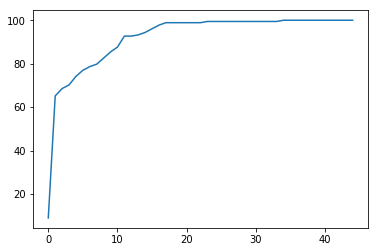

In [11]:
# np.random.seed(0)
# This is what we return at the end
model = init_wts_bias(inputs=n0, lyr1= n1, lyr2=n2, outputs= n3)
model = train(model,X,y,learning_rate=lr,epochs=epoch,print_loss=True)
plt.plot(losses)

We start by feeding data into the neural network and perform several matrix operations on this input data, layer by layer. For each of our three layers, we take the dot product of the input by the weights and add a bias. Next, we pass this output through an activation function of choice.

The output of this activation function is then used as an input for the following layer to follow the same procedure. This process is iterated three times since we have three layers. Our final output is y-hat, which is the prediction on which wine belongs to which cultivar. This is the end of the forward propagation process.

We then calculate the difference between our prediction (y-hat) and the expected output (y) and use this error value during backpropagation.

During backpropagation, we take our error — the difference between our prediction y-hat and y — and we mathematically push it back through the NN in the other direction. We are learning from our mistakes.

By taking the derivative of the functions we used during the first process, we try to discover what value we should give the weights in order to achieve the best possible prediction. Essentially we want to know what the relationship is between the value of our weight and the error that we get out as the result.

And after many epochs or iterations, the NN has learned to give us more accurate predictions by adapting its parameters to our dataset.